In [ ]:
!pip install snakeviz
!pip install flask
!pip install pyngrok

In [2]:
import numpy as np
from collections import Counter
import cProfile

def mode_using_counter(list_of_numbers):
    c = Counter(list_of_numbers)
    return c.most_common(1)[0][0]

In [3]:
# Criando os números aleatórios
random_integers = np.random.randint(1, 10000, 10000)
# Criar o arquivo de perfil de desempenho
profiler = cProfile.Profile()
profiler.enable()
mode_using_counter(random_integers)
profiler.disable()
# Salvar o perfil em um arquivo
profiler.dump_stats("profile_results.prof")

In [ ]:
import subprocess
import time
print("Iniciando o servidor SnakeViz...")
server_process = subprocess.Popen(["snakeviz", "profile_results.prof", "--server", "--port", "8050"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(600)
print("Servidor SnakeViz rodando na porta 8050!")

Iniciando o servidor SnakeViz...


In [ ]:
from pyngrok import ngrok

print("Iniciando autenticação Ngrok")
!ngrok authtoken "TOKEN"
print("Matando conexões antigas")
ngrok.kill()
try:
    print("Tentando abrir o túnel")
    public_url = ngrok.connect(8050)
    print("Túnel criado com sucesso")
    time.sleep(3)
    snakeviz_path = "/snakeviz/%2Fcontent%2Fprofile_results.prof"
    full_url = public_url.public_url + snakeviz_path
    print("Acesse SnakeViz em:", full_url)
except Exception as e:
    print("Erro ao iniciar Ngrok:", e)

In [3]:
import numpy as np
from collections import Counter
import psutil
import os

def mode_using_counter(n_integers):
    """Gera números aleatórios e retorna o mais frequente"""
    process = psutil.Process(os.getpid())  # Obter o processo atual
    mem_before = process.memory_info().rss / 1024 ** 2  # Memória antes (MB)
    random_integers = np.random.randint(1, 100_000, n_integers)
    c = Counter(random_integers)
    result = c.most_common(1)[0][0]
    mem_after = process.memory_info().rss / 1024 ** 2  # Memória depois (MB)
    print(f" Memória antes: {mem_before:.2f} MB")
    print(f" Memória depois: {mem_after:.2f} MB")
    print(f" Diferença de memória: {mem_after - mem_before:.2f} MB")
    return result

mode_using_counter(100_000)


 Memória antes: 104.43 MB
 Memória depois: 109.86 MB
 Diferença de memória: 5.44 MB


np.int32(73844)

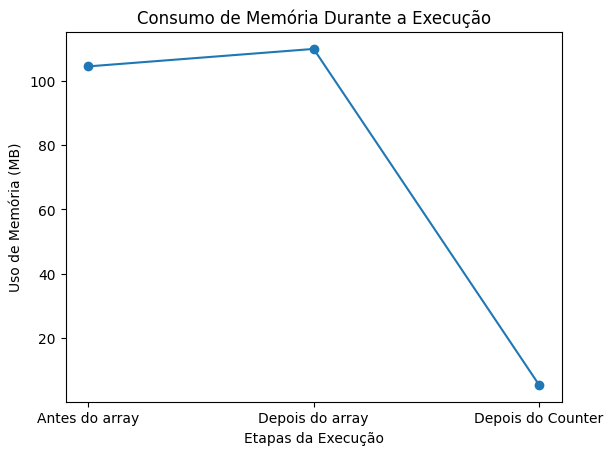

In [4]:
import matplotlib.pyplot as plt
memory_usage = [104.43, 109.86, 5.44]
steps = ["Antes do array", "Depois do array", "Depois do Counter"]
plt.plot(steps, memory_usage, marker="o", linestyle="-")
plt.xlabel("Etapas da Execução")
plt.ylabel("Uso de Memória (MB)")
plt.title("Consumo de Memória Durante a Execução")
plt.show()